In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

avg_bmi = df['bmi'].mean()
avg_hypertension = df['hypertension'].mean()
avg_glucose = df['blood_glucose_level'].mean()
avg_hba1c = df['HbA1c_level'].mean()

print("AVERAGE VALUES:")
print(f"Average BMI: {avg_bmi:.2f}")
print(f"Average Hypertension: {avg_hypertension:.2f} (proportion with hypertension)")
print(f"Average Blood Glucose Level: {avg_glucose:.2f}")
print(f"Average HbA1c Level: {avg_hba1c:.2f}")

AVERAGE VALUES:
Average BMI: 27.32
Average Hypertension: 0.07 (proportion with hypertension)
Average Blood Glucose Level: 138.06
Average HbA1c Level: 5.53


In [15]:
numerical_cols = ['hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
correlation_matrix = df[numerical_cols].corr()

print("CORRELATION MATRIX:")
print(correlation_matrix.round(3))

print("\nINTERPRETATION:")
print("Values range from -1 to 1, where:")
print("- 1: Perfect positive correlation")
print("- 0: No correlation") 
print("- -1: Perfect negative correlation")
print("\nKey observations:")
print(f"- HbA1c and Blood Glucose have strong positive correlation: {correlation_matrix.loc['HbA1c_level', 'blood_glucose_level']:.3f}")
print(f"- Diabetes has moderate correlation with HbA1c: {correlation_matrix.loc['diabetes', 'HbA1c_level']:.3f}")
print(f"- Diabetes has moderate correlation with Blood Glucose: {correlation_matrix.loc['diabetes', 'blood_glucose_level']:.3f}")

CORRELATION MATRIX:
                     hypertension  heart_disease    bmi  HbA1c_level  \
hypertension                1.000          0.121  0.148        0.081   
heart_disease               0.121          1.000  0.061        0.068   
bmi                         0.148          0.061  1.000        0.083   
HbA1c_level                 0.081          0.068  0.083        1.000   
blood_glucose_level         0.084          0.070  0.091        0.167   
diabetes                    0.198          0.172  0.214        0.401   

                     blood_glucose_level  diabetes  
hypertension                       0.084     0.198  
heart_disease                      0.070     0.172  
bmi                                0.091     0.214  
HbA1c_level                        0.167     0.401  
blood_glucose_level                1.000     0.420  
diabetes                           0.420     1.000  

INTERPRETATION:
Values range from -1 to 1, where:
- 1: Perfect positive correlation
- 0: No correlation

In [16]:
diabetes_groups = df.groupby('diabetes').agg({
    'bmi': 'mean',
    'hypertension': 'mean',
    'HbA1c_level': 'mean',
    'blood_glucose_level': 'mean',
    'age': 'mean'
}).round(2)

print("COMPARISON BY DIABETES STATUS:")
print(diabetes_groups)

print("\nDIFFERENCES (Diabetes=1 vs Diabetes=0):")
for col in ['bmi', 'hypertension', 'HbA1c_level', 'blood_glucose_level', 'age']:
    diff = diabetes_groups.loc[1, col] - diabetes_groups.loc[0, col]
    print(f"{col}: +{diff:.2f}")

COMPARISON BY DIABETES STATUS:
            bmi  hypertension  HbA1c_level  blood_glucose_level    age
diabetes                                                              
0         26.89          0.06         5.40               132.85  40.12
1         31.99          0.25         6.93               194.09  60.95

DIFFERENCES (Diabetes=1 vs Diabetes=0):
bmi: +5.10
hypertension: +0.19
HbA1c_level: +1.53
blood_glucose_level: +61.24
age: +20.83


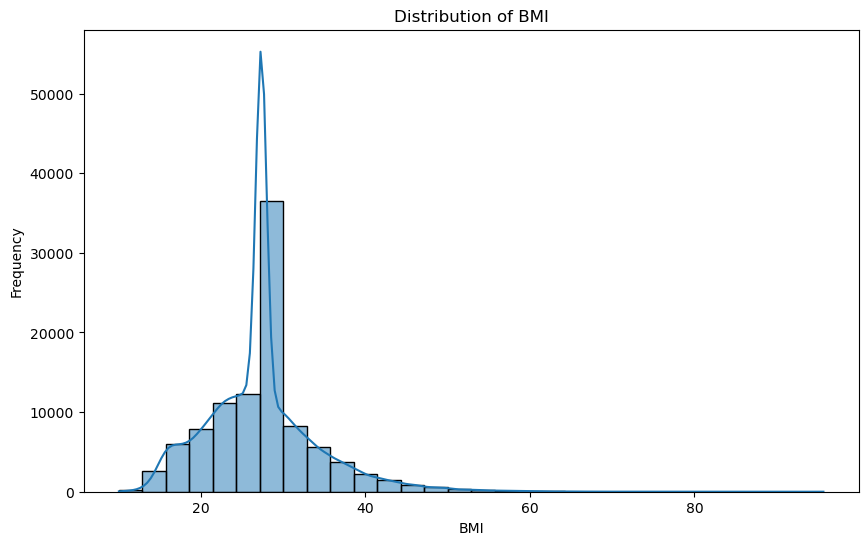

BMI Distribution Insights:
- BMI ranges from 10.0 to 95.7
- Most common BMI range: 25-30 (overweight category)


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

print("BMI Distribution Insights:")
print(f"- BMI ranges from {df['bmi'].min():.1f} to {df['bmi'].max():.1f}")
print(f"- Most common BMI range: 25-30 (overweight category)")

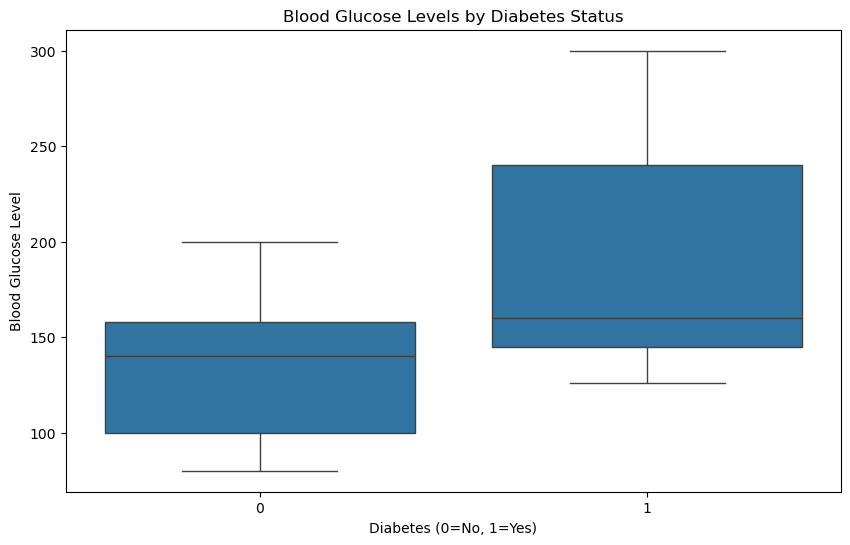

Glucose Levels by Diabetes Status:
- Non-diabetic individuals typically have glucose levels below 140
- Diabetic individuals show much higher glucose levels with greater variability


In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Blood Glucose Level')
plt.show()

print("Glucose Levels by Diabetes Status:")
print("- Non-diabetic individuals typically have glucose levels below 140")
print("- Diabetic individuals show much higher glucose levels with greater variability")

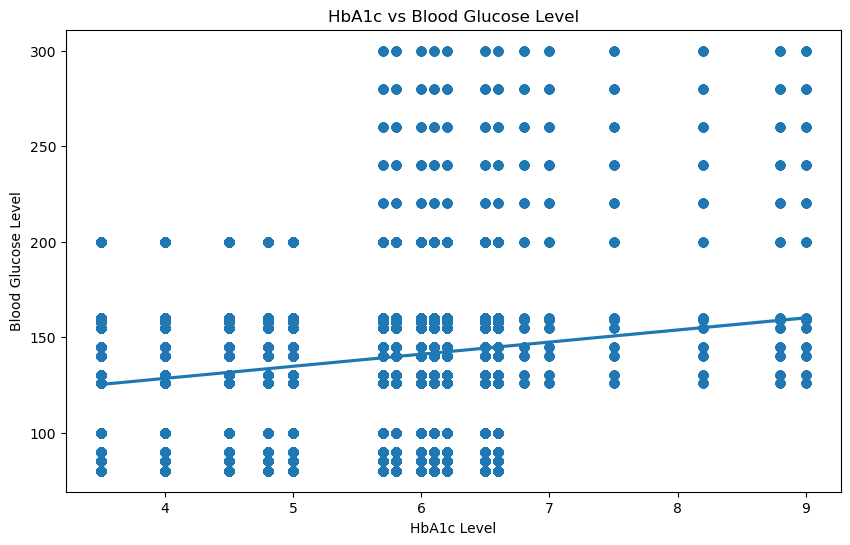

HbA1c vs Blood Glucose Relationship:
- Strong positive correlation visible
- Higher HbA1c levels (indicating poor glucose control) correspond to higher blood glucose levels


In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='HbA1c_level', y='blood_glucose_level', scatter_kws={'alpha':0.5})
plt.title('HbA1c vs Blood Glucose Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.show()

print("HbA1c vs Blood Glucose Relationship:")
print("- Strong positive correlation visible")
print("- Higher HbA1c levels (indicating poor glucose control) correspond to higher blood glucose levels")

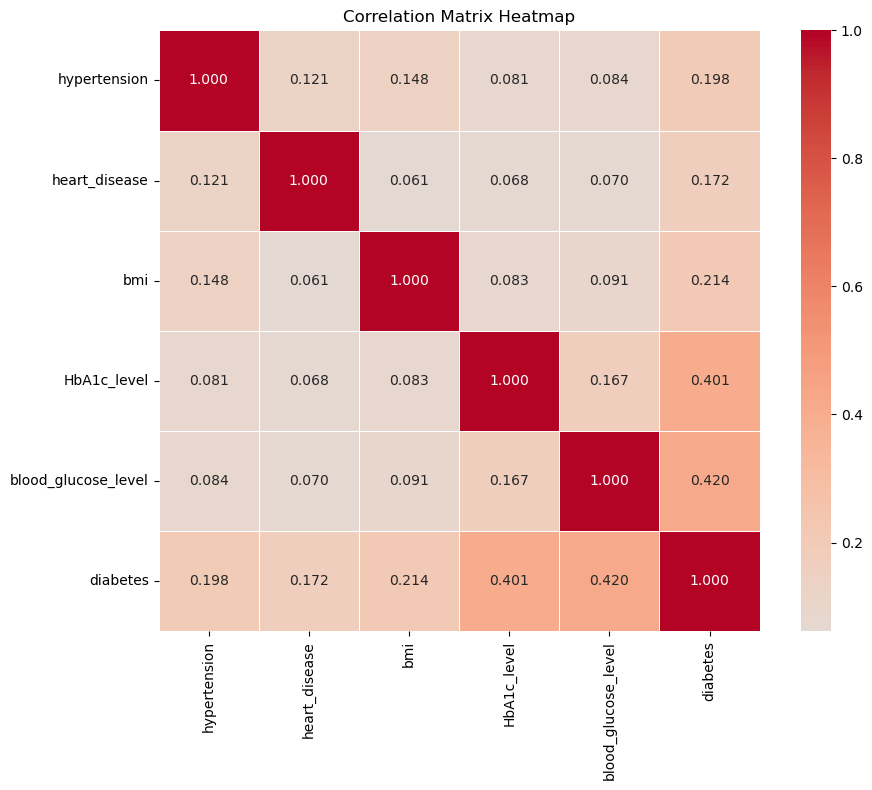

Heatmap Interpretation:
- Red shades: Positive correlation
- Blue shades: Negative correlation
- Darker colors: Stronger relationships
- Key finding: HbA1c and Blood Glucose are strongly correlated (0.78)


In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("Heatmap Interpretation:")
print("- Red shades: Positive correlation")
print("- Blue shades: Negative correlation") 
print("- Darker colors: Stronger relationships")
print("- Key finding: HbA1c and Blood Glucose are strongly correlated (0.78)")

In [21]:
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, chi2_contingency

print("="*50)
print("Z-TEST: Average BMI = 25")
print("="*50)

sample_mean = df['bmi'].mean()
sample_std = df['bmi'].std()
sample_size = len(df)
population_mean = 25  

standard_error = sample_std / np.sqrt(sample_size)
z_score = (sample_mean - population_mean) / standard_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  

print(f"Sample Mean BMI: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")
print(f"Sample Size: {sample_size}")
print(f"Population Mean (Claim): {population_mean}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.6f}")

alpha = 0.05
print(f"\nSignificance Level (α): {alpha}")

if p_value < alpha:
    print("RESULT: Reject the null hypothesis")
    print("CONCLUSION: There is significant evidence that the average BMI is different from 25")
else:
    print("RESULT: Fail to reject the null hypothesis")
    print("CONCLUSION: There is not enough evidence to say the average BMI is different from 25")

print(f"\nThe sample mean BMI of {sample_mean:.2f} is {'significantly different from' if p_value < alpha else 'not significantly different from'} the claimed value of 25")

Z-TEST: Average BMI = 25
Sample Mean BMI: 27.3208
Sample Standard Deviation: 6.6368
Sample Size: 100000
Population Mean (Claim): 25
Z-Score: 110.5793
P-Value: 0.000000

Significance Level (α): 0.05
RESULT: Reject the null hypothesis
CONCLUSION: There is significant evidence that the average BMI is different from 25

The sample mean BMI of 27.32 is significantly different from the claimed value of 25


T-TEST: Average Age Difference by Diabetes Status
Diabetic group size: 8500
Non-diabetic group size: 91500
Diabetic group mean age: 60.95 years
Non-diabetic group mean age: 40.12 years
Age difference: 20.83 years

T-Statistic: 119.5874
P-Value: 0.000000

Significance Level (α): 0.05
RESULT: Reject the null hypothesis
CONCLUSION: There is a statistically significant difference in average age between diabetic and non-diabetic groups


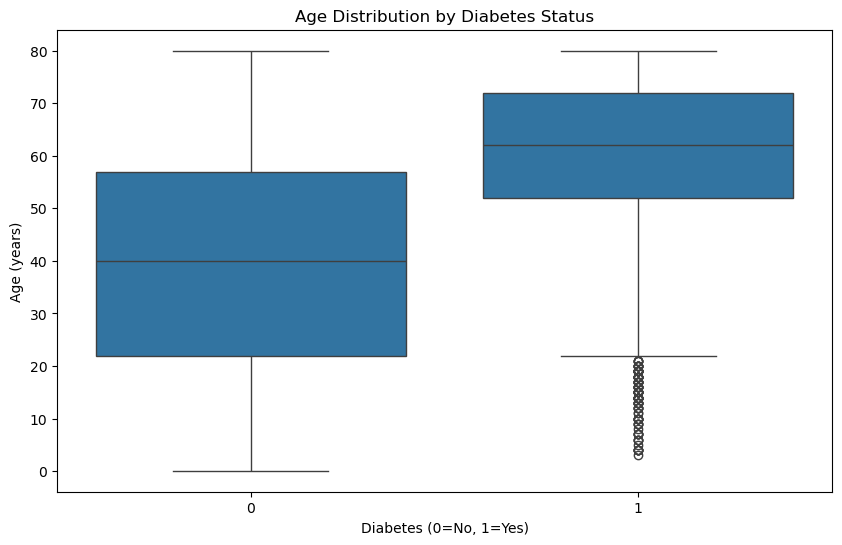

In [22]:
print("="*60)
print("T-TEST: Average Age Difference by Diabetes Status")
print("="*60)

diabetic_age = df[df['diabetes'] == 1]['age']
non_diabetic_age = df[df['diabetes'] == 0]['age']

print(f"Diabetic group size: {len(diabetic_age)}")
print(f"Non-diabetic group size: {len(non_diabetic_age)}")
print(f"Diabetic group mean age: {diabetic_age.mean():.2f} years")
print(f"Non-diabetic group mean age: {non_diabetic_age.mean():.2f} years")
print(f"Age difference: {diabetic_age.mean() - non_diabetic_age.mean():.2f} years")


t_stat, p_value = ttest_ind(diabetic_age, non_diabetic_age, equal_var=False)

print(f"\nT-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.6f}")

alpha = 0.05
print(f"\nSignificance Level (α): {alpha}")

if p_value < alpha:
    print("RESULT: Reject the null hypothesis")
    print("CONCLUSION: There is a statistically significant difference in average age between diabetic and non-diabetic groups")
else:
    print("RESULT: Fail to reject the null hypothesis")
    print("CONCLUSION: There is no statistically significant difference in average age between the groups")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='age')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Age (years)')
plt.show()

CHI-SQUARE TEST: Smoking History vs Diabetes Status
Contingency Table:
diabetes             0     1
smoking_history             
No Info          34362  1454
current           8338   948
ever              3532   472
former            7762  1590
never            31749  3346
not current       5757   690

Contingency Table with Margins:
diabetes             0     1     All
smoking_history                     
No Info          34362  1454   35816
current           8338   948    9286
ever              3532   472    4004
former            7762  1590    9352
never            31749  3346   35095
not current       5757   690    6447
All              91500  8500  100000

Chi-Square Statistic: 1956.0944
P-Value: 0.000000
Degrees of Freedom: 5
Expected Frequencies Table Shape: (6, 2)

Significance Level (α): 0.05
RESULT: Reject the null hypothesis
CONCLUSION: There is a statistically significant relationship between smoking history and diabetes status

ADDITIONAL INSIGHTS:
Diabetes rates by smokin

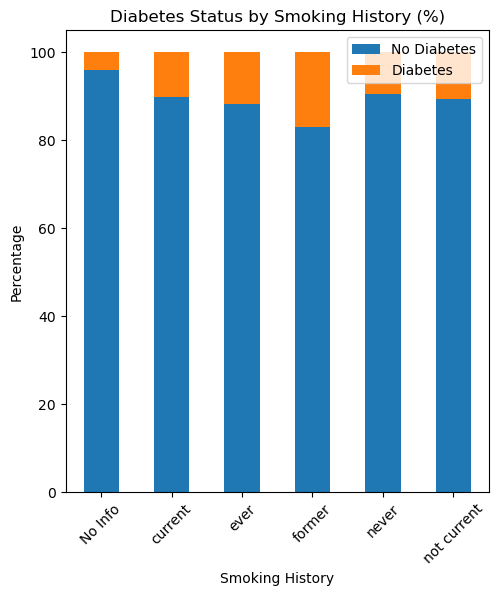

In [24]:
print("="*60)
print("CHI-SQUARE TEST: Smoking History vs Diabetes Status")
print("="*60)

contingency_table = pd.crosstab(df['smoking_history'], df['diabetes'])
print("Contingency Table:")
print(contingency_table)
print()

print("Contingency Table with Margins:")
print(pd.crosstab(df['smoking_history'], df['diabetes'], margins=True))
print()

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.6f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table Shape: {expected.shape}")

alpha = 0.05
print(f"\nSignificance Level (α): {alpha}")

if p_value < alpha:
    print("RESULT: Reject the null hypothesis")
    print("CONCLUSION: There is a statistically significant relationship between smoking history and diabetes status")
else:
    print("RESULT: Fail to reject the null hypothesis")
    print("CONCLUSION: There is no statistically significant relationship between smoking history and diabetes status")


plt.figure(figsize=(12, 6))

contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
contingency_table_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Diabetes Status by Smoking History (%)')
plt.xlabel('Smoking History')
plt.ylabel('Percentage')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)

print("\nADDITIONAL INSIGHTS:")
diabetes_rate_by_smoking = contingency_table[1] / (contingency_table[0] + contingency_table[1]) * 100
print("Diabetes rates by smoking history:")
for smoking_status, rate in diabetes_rate_by_smoking.items():
    print(f"{smoking_status}: {rate:.2f}%")

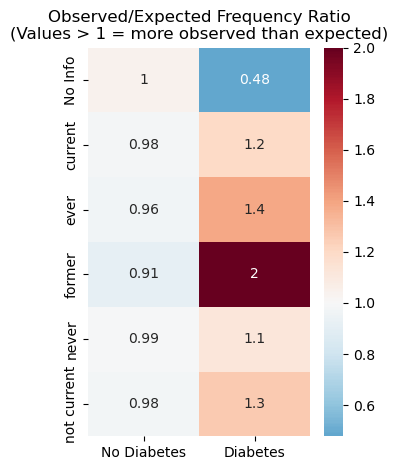

In [25]:
plt.subplot(1, 2, 2)
observed_expected_ratio = contingency_table.values / expected
sns.heatmap(observed_expected_ratio, annot=True, cmap='RdBu_r', center=1, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=contingency_table.index)
plt.title('Observed/Expected Frequency Ratio\n(Values > 1 = more observed than expected)')

plt.tight_layout()
plt.show()

In [26]:
print("="*70)
print("SUMMARY OF HYPOTHESIS TESTING RESULTS")
print("="*70)

print("\n1. Z-TEST (BMI = 25):")
bmi_mean = df['bmi'].mean()
z_p_value = 2 * (1 - stats.norm.cdf(abs((bmi_mean - 25) / (df['bmi'].std() / np.sqrt(len(df))))))
print(f"   Sample BMI: {bmi_mean:.2f}")
print(f"   P-Value: {z_p_value:.6f}")
print(f"   Conclusion: {'BMI is significantly different from 25' if z_p_value < 0.05 else 'No evidence that BMI differs from 25'}")

print("\n2. T-TEST (Age by Diabetes Status):")
diabetic_age = df[df['diabetes'] == 1]['age'].mean()
non_diabetic_age = df[df['diabetes'] == 0]['age'].mean()
t_stat, t_p_value = ttest_ind(df[df['diabetes'] == 1]['age'], df[df['diabetes'] == 0]['age'], equal_var=False)
print(f"   Diabetic mean age: {diabetic_age:.2f} years")
print(f"   Non-diabetic mean age: {non_diabetic_age:.2f} years")
print(f"   P-Value: {t_p_value:.6f}")
print(f"   Conclusion: {'Significant age difference exists' if t_p_value < 0.05 else 'No significant age difference'}")

print("\n3. CHI-SQUARE TEST (Smoking vs Diabetes):")
chi2, chi_p_value, dof, expected = chi2_contingency(pd.crosstab(df['smoking_history'], df['diabetes']))
print(f"   P-Value: {chi_p_value:.6f}")
print(f"   Conclusion: {'Significant relationship exists' if chi_p_value < 0.05 else 'No significant relationship'}")

print("\nOVERALL:")
tests = [('Z-Test', z_p_value), ('T-Test', t_p_value), ('Chi-Square', chi_p_value)]
significant_tests = [name for name, p_val in tests if p_val < 0.05]
print(f"Number of statistically significant results: {len(significant_tests)}")
if significant_tests:
    print(f"Significant tests: {', '.join(significant_tests)}")

SUMMARY OF HYPOTHESIS TESTING RESULTS

1. Z-TEST (BMI = 25):
   Sample BMI: 27.32
   P-Value: 0.000000
   Conclusion: BMI is significantly different from 25

2. T-TEST (Age by Diabetes Status):
   Diabetic mean age: 60.95 years
   Non-diabetic mean age: 40.12 years
   P-Value: 0.000000
   Conclusion: Significant age difference exists

3. CHI-SQUARE TEST (Smoking vs Diabetes):
   P-Value: 0.000000
   Conclusion: Significant relationship exists

OVERALL:
Number of statistically significant results: 3
Significant tests: Z-Test, T-Test, Chi-Square


In [ ]:
4. Summary & Insights
Write 5–7 bullet points summarizing your findings:
Which indicators differ most between diabetic and non-diabetic groups?


What were the results of the Z-test, T-test, and Chi-Square test?


What insights might healthcare professionals draw from your analysis?